In [11]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

# Plot snow depths first (just to take a look)

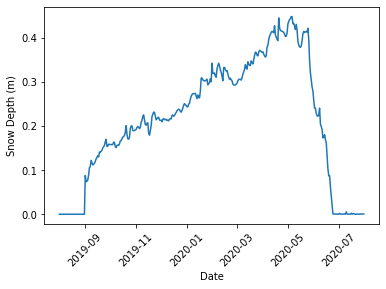

In [2]:
SM_df = pd.read_csv('Output.csv')

# Make a list of python datetime objects

sm_dates = [datetime.datetime.strptime(t,"%Y-%m-%d") for t in SM_df['Date']]

# Plot the depths against the datetime objects

plt.plot(sm_dates, SM_df['Depth'])

plt.ylabel('Snow Depth (m)')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.show()

# Now take a quick look at a test magnaprobe file

In [3]:
magna_df = pd.read_csv('/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-1_7-62/magnaprobe-transect-20191114-PS122-1_7-62.dat',skiprows=3)

magna_df.columns = ["TIMESTAMP","RECORD","Counter","DepthCm","BattVolts","latitude_a","latitude_b","Longitude_a",
                    "Longitude_b","fix_quality","nmbr_satellites","HDOP","altitudeB","DepthVolts","LatitudeDDDDD",
                    "LongitudeDDDDD","month","dayofmonth","hourofday","minutes","seconds","microseconds"]


# So the 'TIMESTAMP' column is just strings at the moment
# The following line makes a new column (called 'datetimes') of python datetime objects
# I've used a one-line list comprehension, but you can view it as a bit like:

# datetimes = []
# for t in magna_df['TIMESTAMP']:
#     string_no_decimal = t.split('.')[0]
#     dt = datetime.datetime.strptime(string_no_decimal,"%Y-%m-%d %H:%M:%S")    
#     datetimes.append(dt)
# magna_df['datetimes'] = datetimes

magna_df['datetimes'] = [datetime.datetime.strptime(t.split('.')[0],"%Y-%m-%d %H:%M:%S") for t in magna_df['TIMESTAMP']]

magna_df.set_index('datetimes',inplace=True)

magna_df

,TIMESTAMP,RECORD,Counter,DepthCm,BattVolts,latitude_a,latitude_b,Longitude_a,Longitude_b,fix_quality,...,altitudeB,DepthVolts,LatitudeDDDDD,LongitudeDDDDD,month,dayofmonth,hourofday,minutes,seconds,microseconds
datetimes,,,,,,,,,,,,,,,,,,,,,
2019-11-14 00:37:32,2019-11-14 00:37:32.57,3901,100001,7.893,12.93,86,9.862001,118,10.2816,1,...,-3.7,0.510,0.164367,0.171360,11,14,0,37,31,890000
2019-11-14 00:37:38,2019-11-14 00:37:38.25,3902,100002,120.300,12.93,86,9.862200,118,10.2831,1,...,-3.6,7.713,0.164370,0.171385,11,14,0,37,37,570000
2019-11-14 00:42:49,2019-11-14 00:42:49.73,3903,100003,56.410,12.80,86,9.870900,118,10.3870,1,...,6.4,3.620,0.164515,0.173117,11,14,0,42,49,50000
2019-11-14 00:42:52,2019-11-14 00:42:52.76,3904,100004,38.800,12.85,86,9.870900,118,10.3989,1,...,6.4,2.491,0.164515,0.173315,11,14,0,42,52,80000
2019-11-14 00:42:55,2019-11-14 00:42:55.65,3905,100005,53.400,12.85,86,9.871200,118,10.4101,1,...,6.2,3.427,0.164520,0.173502,11,14,0,42,54,960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-14 03:03:21,2019-11-14 03:03:21.85,5702,101802,29.850,12.30,86,10.115600,118,11.4663,1,...,-7.1,1.917,0.168593,0.191105,11,14,3,3,21,170000
2019-11-14 03:03:24,2019-11-14 03:03:24.71,5703,101803,32.810,12.31,86,10.115300,118,11.4867,1,...,-7.0,2.107,0.168588,0.191445,11,14,3,3,24,30000
2019-11-14 03:03:27,2019-11-14 03:03:27.03,5704,101804,26.840,12.31,86,10.115100,118,11.5009,1,...,-7.1,1.724,0.168585,0.191682,11,14,3,3,26,350000


# Plot magnaprobe data to check it

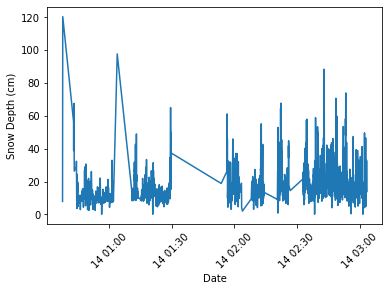

In [4]:
plt.plot(magna_df.index, magna_df['DepthCm'])
plt.ylabel('Snow Depth (cm)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

# Now plot MagnaProbe mean depth on SnowModel-LG 

In [16]:
import matplotlib.dates as dates

In [17]:
t = magna_df.index[0]
dates.date2num(t)

18214.026064814814

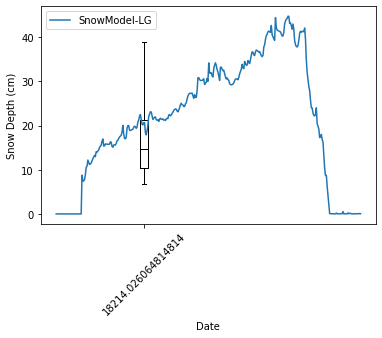

In [25]:
mean_magna_depth = np.nanmean(magna_df['DepthCm'])

# Plot magna mean depth with depth set to the first date.

# plt.scatter(magna_df.index[0], mean_magna_depth,color='red',marker='x',label='Magna Mean')

plt.boxplot(magna_df['DepthCm'], positions= [dates.date2num(magna_df.index[0])], widths=10,whis=[5,95],
            medianprops=dict(color='k'), sym="")

plt.plot([dates.date2num(t) for t in sm_dates], SM_df['Depth']*100, label='SnowModel-LG')

plt.ylabel('Snow Depth (cm)')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.legend()

plt.show()

# Now get the mean magnaprobe data from every file

In [26]:
import os
from fnmatch import fnmatch

In [27]:
# Get all the filenames of .dat files in a big list

root = '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe'
pattern = "*.dat"

dirs = []

for path, subdirs, files in os.walk(root):
    for name in files:
        if '.dat' in name:
            dirs.append(f'{path}/{name}')
            
dirs

['/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-3_34-89/ANJA_51_RS_Site.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-5_62-242/ANJA_21.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-1_6-50/magnaprobe-transect-20191107-PS122-1_6-50.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-4_44-268/ANJA_63.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-5_61-111/ANJA_18.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-3_38-82/ANJA_57_RS_site.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_20-43/ANJA_32.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_20-43/._ANJA_32.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_20-124/ANJA_35_RunwayDown.dat',
 '/home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_20-124/ANJA_35_FortRidge.dat',
 '/home/robbie/Dropbox/

failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_20-43/._ANJA_32.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_19-103/BRUCE01.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_19-107/._ANJA_27.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-4_47-224/ANJA_3.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_19-113/._ANJA_29.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_19-101/BRUCE00.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_20-95/._ANJA_33_cleanN.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_19-110/._ANJA_28.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_19-110/._ANJA_28N.dat
failed /home/robbie/Dropbox/find_mosaic_parcel/raw_data/magnaprobe/PS122-2_19-110/._ANJA_28S.dat
failed /home/robbie/Dropbox/find_mosaic_

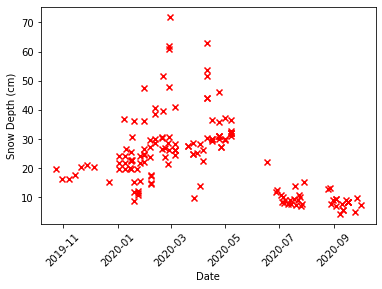

In [28]:
def get_magna(file):
    
    magna_df = pd.read_csv(file,skiprows=3)

    magna_df.columns = ["TIMESTAMP","RECORD","Counter","DepthCm","BattVolts","latitude_a","latitude_b","Longitude_a",
                        "Longitude_b","fix_quality","nmbr_satellites","HDOP","altitudeB","DepthVolts","LatitudeDDDDD",
                        "LongitudeDDDDD","month","dayofmonth","hourofday","minutes","seconds","microseconds"]

    magna_df['datetimes'] = [datetime.datetime.strptime(t.split('.')[0],"%Y-%m-%d %H:%M:%S") for t in magna_df['TIMESTAMP']]

    magna_df.set_index('datetimes',inplace=True)

    return magna_df
    
#     return(magna_df.index[0], np.nanmean(magna_df['DepthCm']), np.nanstd(magna_df['DepthCm']))



magna_dates = []
magna_depths = []
magna_std = []

magna_data = {}

for file in dirs:
    try:
        
        magna_df = get_magna(file)
        (d0, mean_depth, std_depth) = (magna_df.index[0], np.nanmean(magna_df['DepthCm']), np.nanstd(magna_df['DepthCm']))
        magna_dates.append(d0)
        magna_depths.append(mean_depth)
        magna_std.append(std_depth)
        
        magna_data[file] = magna_df
        
    except:
        print(f'failed {file}')
    
plt.ylabel('Snow Depth (cm)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.scatter(magna_dates, magna_depths,color='r',marker='x')

In [29]:
import pickle
pickle.dump(magna_data, open('/home/robbie/Dropbox/SP_W99_Drifters/magna_dfs.p', 'wb'))

In [30]:
print()

In [54]:


list_of_lists = []

for key in magna_data:
    list_of_lists.append(list(magna_data[key]['DepthCm']))

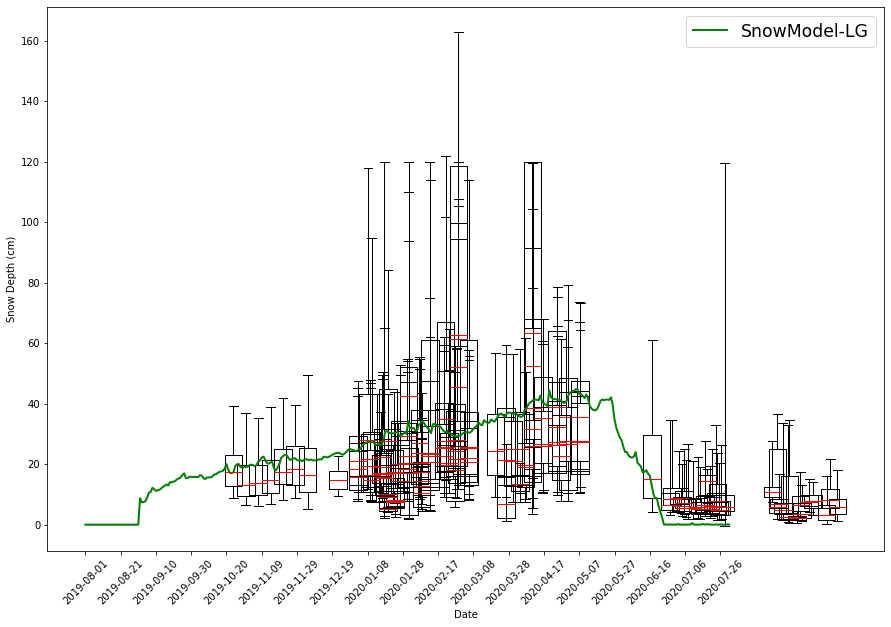

In [53]:

plt.figure(figsize=(15,10))

md = [dates.date2num(d) for d in magna_dates]

plt.boxplot(list_of_lists,positions=md,widths=10,whis=[5,95],
            medianprops=dict(color='r'), sym="")


plt.plot([dates.date2num(d) for d in sm_dates], SM_df['Depth']*100, 
         label='SnowModel-LG',zorder=2,lw=2,color='green')

plt.ylabel('Snow Depth (cm)', fontsize='xx-large')
plt.xlabel('Date', fontsize='xx-large')

skipper = 20
plt.xticks([dates.date2num(d) for d in sm_dates][::skipper],[d.date() for d in sm_dates][::skipper],rotation=45)

plt.legend(fontsize='xx-large')

plt.show()

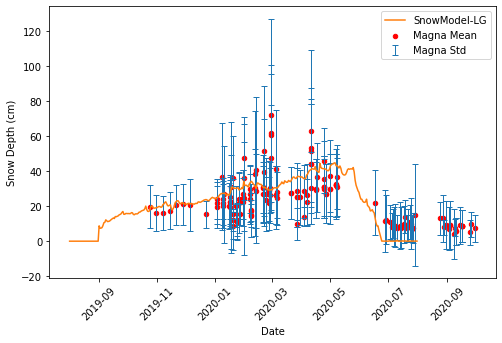

In [45]:

plt.figure(figsize=(8,5))

md = [d.to_datetime64() for d in magna_dates]

plt.errorbar(x=md,y=magna_depths,yerr=magna_std,ls='none', capsize=3, label='Magna Std',lw=1)
plt.scatter(md[:], magna_depths[:],color='r',marker='o',s=20,label='Magna Mean')

plt.plot(sm_dates, SM_df['Depth']*100, label='SnowModel-LG')

plt.ylabel('Snow Depth (cm)')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.legend()

plt.show()